Data and Sampling Distributions

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import pylab

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
loans_income = pd.read_csv('/content/sample_data/loans_income.csv')
sp500_px = pd.read_csv('/content/sample_data/sp500_px.csv')

In [ ]:
samples = loans_income.sample(n=1000)
samples

,x
24425,69000
47098,64000
12839,45000
4621,72000
9634,76000
...,...
33501,50564
41849,52000
12272,27000
21205,60000


In [ ]:
samples.shape

(1000, 1)

In [ ]:
samples.head

<bound method NDFrame.head of             x
24425   69000
47098   64000
12839   45000
4621    72000
9634    76000
...       ...
33501   50564
41849   52000
12272   27000
21205   60000
13490  120000

[1000 rows x 1 columns]>

Sampling Distribution of a Statistic

In [ ]:
sample_mean_5 = samples.rolling(5).mean().x
sample_mean_5 = sample_mean_5.dropna()
sample_mean_5

9634     65200.0
3976     71400.0
967      69800.0
12207    83800.0
35820    77000.0
          ...   
33501    62640.8
41849    61808.8
12272    42208.8
21205    45608.8
13490    61912.8
Name: x, Length: 996, dtype: float64

In [ ]:
sample_mean_20 = samples.rolling(20).mean().x
sample_mean_20 = sample_mean_20.dropna()
sample_mean_20

42695    66081.4
4512     64781.4
8208     64181.4
20585    64115.9
3971     62815.9
          ...   
33501    73769.1
41849    72284.1
12272    70585.2
21205    67835.2
13490    70035.2
Name: x, Length: 981, dtype: float64

In [ ]:
sample_mean_30 = samples.rolling(30).mean().x
sample_mean_30 = sample_mean_30.dropna()
sample_mean_30

3807     67727.266667
3010     67093.933333
30153    66460.600000
18405    67793.933333
27921    68227.266667
             ...     
33501    76146.400000
41849    75573.066667
12272    74534.400000
21205    75201.066667
13490    75234.400000
Name: x, Length: 971, dtype: float64

Text(0.5, 1.0, 'Full Plot of the whole DATAFRAME')

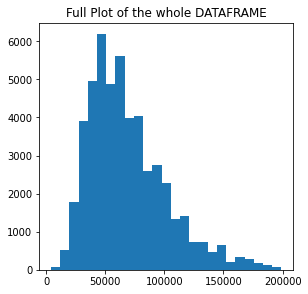

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.hist(loans_income.x,bins=25)
plt.title('Full Plot of the whole DATAFRAME')

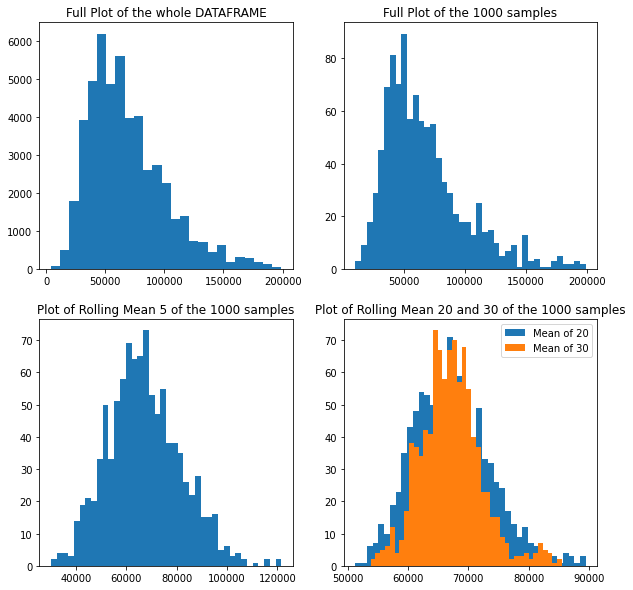

In [ ]:
fig = plt.figure(figsize=(10,10))
#The full distribution of the plot:
ax = fig.add_subplot(2,2,1)
ax.hist(loans_income.x,bins=25)
plt.title('Full Plot of the whole DATAFRAME')
ax = fig.add_subplot(2,2,2)
ax.hist(samples.x,bins=40)
plt.title('Full Plot of the 1000 samples')
ax = fig.add_subplot(2,2,3)
ax.hist(sample_mean_5,bins=40)
plt.title('Plot of Rolling Mean 5 of the 1000 samples')
ax = fig.add_subplot(2,2,4)
ax.hist(sample_mean_20,bins=40,label='Mean of 20')
ax.hist(sample_mean_30,bins=40,label='Mean of 30')
plt.title('Plot of Rolling Mean 20 and 30 of the 1000 samples')
ax.legend()
plt.show()

plt.show()

Population stats

In [ ]:
print('Total Population STD : ',loans_income.x.std())
print('Total Population Mean : ',loans_income.x.mean())
print('Total Population Median : ',np.median(loans_income.x))
print('Total Population Standard Error:',stats.sem(loans_income.x, ddof=1))

Total Population STD :  32872.03536985002
Total Population Mean :  68760.51844
Total Population Median :  62000.0
Total Population Standard Error: 147.00821129152527


Bootstrapping for 1000,10000,20000 Samples

In [ ]:
bootstrap_1000 = np.random.choice(loans_income.x,size=1000,replace=True)
bootstrap_10000 = np.random.choice(loans_income.x,size=10000,replace=True)
bootstrap_20000 = np.random.choice(loans_income.x,size=20000,replace=True)
arr_bootstraps = [bootstrap_1000,bootstrap_10000,bootstrap_20000]
arr_bootstraps

[array([ 75000,  48000, 107000,  60324,  69500, 105000,  56000,  55000,
         75000,  50000,  24000,  28000,  50000,  24000,  98004,  86500,
         87000,  65000,  43000,  30000,  75000,  52000,  35000,  75000,
         70000,  25000,  38000,  18000, 137000,  55000, 111700,  49000,
        180000,  80000, 110000,  50000,  95000,  75000,  33000,  65000,
         36000,  52000, 170000,  75000, 110000, 150000,  54000,  40000,
         72500,  95000, 170000,  67000,  40000,  91000,  48500,  98000,
        100000,  82000,  47000,  90000, 155000,  80000,  45000,  21912,
         72000,  60000,  80000, 110520,  62000,  90000, 100000,  75000,
        167000,  25000,  27000, 120000,  45000,  52000,  35000,  37500,
         50000, 130000,  71000, 106552,  58000,  78000,  31000, 149000,
         62000,  50000,  92000,  98000,  55000,  24000,  36000,  51000,
         85000,  30000,  70000, 104500,  40000,  43500,  95000,  51000,
         50000,  50000,  54800,  39000,  62000, 141675,  64000, 

In [ ]:
bootstrap_1000 = np.random.choice(loans_income.x,size=1000,replace=True)
bootstrap_10000 = np.random.choice(loans_income.x,size=10000,replace=True)
bootstrap_20000 = np.random.choice(loans_income.x,size=20000,replace=True)
arr_bootstraps = [bootstrap_1000,bootstrap_10000,bootstrap_20000]
len(arr_bootstraps)

3

Long-tailed Distributions and QQ-Plot

In [ ]:
stats.probplot(loans_income.x, dist="norm", plot=pylab
pylab.show()

SyntaxError: ignored

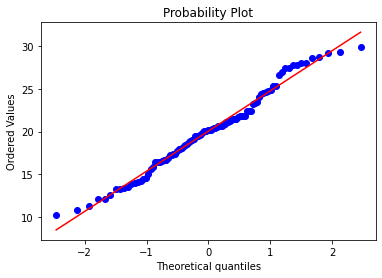

In [ ]:
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

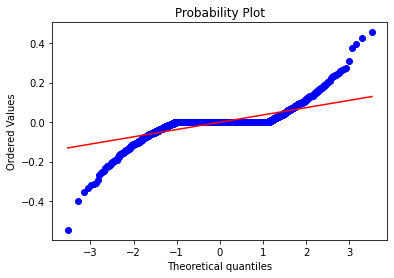

In [ ]:
nflx = sp500_px.loc[:,'NFLX']
stats.probplot(nflx, dist="norm", plot=pylab)
pylab.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:1280: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


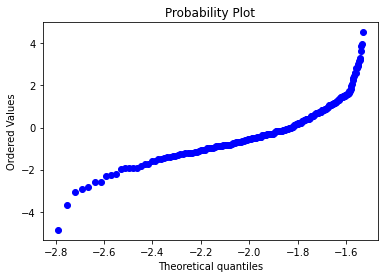

In [ ]:
treated_nflx = np.diff(np.log(nflx))
stats.probplot(treated_nflx, dist="norm", plot=pylab,fit=True)
pylab.show()